<a href="https://colab.research.google.com/github/hashisato/geoanalytics/blob/main/s1310105/LunarDataAnalytics_s1310105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Necessary Ubuntu packages

In [1]:
# Installing necessary modules
!apt update
!apt install -y nco cdo gdal-bin
!which ncrename
!which cdo
!which gdal_translate

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,295 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,553 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Package

# Installing geoAnalytics package

In [1]:
!pip install -U geoanalytics

# Knowing the information of geoAnalytics package

In [2]:
pip show geoanalytics

Name: geoanalytics
Version: 2025.6.12.3
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/UdayLab/geoanalytics
Author: 
Author-email: Rage Uday Kiran <uday.rage@gmail.com>
License: GPLv3
Location: /usr/local/lib/python3.11/dist-packages
Requires: deprecated, discord.py, fastparquet, matplotlib, mplcursors, networkx, numba, numpy, pami, pandas, Pillow, plotly, psutil, psycopg2-binary, rasterio, resource, scikit-learn, shapely, sphinx, sphinx-rtd-theme, tqdm, urllib3, validators
Required-by: 


## Download any dataset with extension of both .img and .lbl from the below link

Link --> https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/

Example Direction : --> https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/

## Use !wget command to download the `.img` and `.lbl` files

In [3]:
# Download any files by using the wget command
!wget https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.img

--2025-06-12 06:22:15--  https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.img
Resolving data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)... 159.60.133.108
Connecting to data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)|159.60.133.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92274688 (88M) [application/octet-stream]
Saving to: ‘MI_MAP_03_S16E035S17E036SC.img’

MI_MAP_03_S16E035S1 100%[===================>]  88.00M   159KB/s    in 6m 48s  

2025-06-12 06:29:16 (221 KB/s) - ‘MI_MAP_03_S16E035S17E036SC.img’ saved [92274688/92274688]



In [15]:
!wget https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.lbl

--2025-06-12 06:30:02--  https://data.darts.isas.jaxa.jp/pub/pds3/sln-l-mi-5-map-v3.0/lon035/data/MI_MAP_03_S16E035S17E036SC.lbl
Resolving data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)... 159.60.133.108
Connecting to data.darts.isas.jaxa.jp (data.darts.isas.jaxa.jp)|159.60.133.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12155 (12K)
Saving to: ‘MI_MAP_03_S16E035S17E036SC.lbl’

MI_MAP_03_S16E035S1 100%[===================>]  11.87K  41.9KB/s    in 0.3s    

2025-06-12 06:30:06 (41.9 KB/s) - ‘MI_MAP_03_S16E035S17E036SC.lbl’ saved [12155/12155]



# **Operatioin 1: Raster to CSV**

## ***Step1: Import RasterToTSV package from geoAnalytics.conversion***

In [16]:
# Import Raster To TSV package
from geoanalytics.conversion import Raster2CSV

## ***Step2: Pass the lbl file as input and give desired outputFile name also specify the inputband value as well as ouput band value***

In [17]:
# Specify startBand = 1
# Specify endBand = 9
converter = Raster2CSV.Raster2CSV(inputFile='MI_MAP_03_S16E035S17E036SC.lbl', outputFile='Moon.csv', startBand=1, endBand=9)

## ***Step3: Conver the raster file into a CSV file***

In [18]:
# convert using run() method
converter.run()

Processing: MI_MAP_03_S16E035S17E036SC.lbl


/usr/local/lib/python3.11/dist-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Done. Output saved to: Moon.csv


# **Operation 2 : Clustering the Data**

## ***Step 1: Read the obtained CSV into a dataframe***

In [19]:
# import pandas
import pandas as pd
# read the dataframe with separator as "tab" space
df = pd.read_csv('Moon.csv', sep='\t')
# show the dataframe
df

x           y     1     2     3     4     5     6     7  \
0        1061317.265 -485173.607  1928  3446  3859  3913  4026  3999  4236   
1        1061332.071 -485173.607  1924  3480  3876  3930  4059  3996  4243   
2        1061346.877 -485173.607  1904  3476  3834  3923  4047  3992  4238   
3        1061361.684 -485173.607  1874  3452  3801  3897  3959  3988  4228   
4        1061376.490 -485173.607  1907  3464  3777  3868  3974  3983  4218   
...              ...         ...   ...   ...   ...   ...   ...   ...   ...   
4194299  1091566.583 -515482.151  2090  3719  4007  3996  4117  4056  4310   
4194300  1091581.390 -515482.151  2098  3734  4038  4020  4177  4083  4327   
4194301  1091596.196 -515482.151  2114  3767  4046  4040  4213  4110  4332   
4194302  1091611.002 -515482.151  2123  3813  4019  4056  4214  4136  4331   
4194303  1091625.809 -515482.151  2125  3784  4011  4051  4184  4136  4329   

            8     9  
0        5245  6513  
1        5234  6518  
2        5222  6523  
3        5210  6518  
4        5198  6504  
...       ...   ...  
4194299  5374  6633  
4194300  5389  6659  
4194301  5393  6685  
4194302  5397  6711  
4194303  5402  6737  

[4194304 rows x 11 columns]

## ***Step2: Import any clustering algorithm from geoanalytics.clustering***

In [20]:
# Import the Gaussianmixture algorithm
from geoanalytics.clustering import Gaussianmixture
# Pass the dataframe into the clustering algorithm
obj = Gaussianmixture.Gaussianmixture(dataframe=df)

## ***Step3: Execute the run() method to cluster the data***

### ***Also specify the parameters such as `n_components`, `max_iters` and `random_state` etc,.***

In [21]:
# Assign "labels", "weights" and "means" as output variable names. Since our algorithm is going to return three components respectively
labels, weights, means = obj.run(n_components=4, max_iters=100, covariance_type="full", init_params='kmeans', random_state=0)

## ***Step4: Print the labels***

In [22]:
labels

x           y  labels
0        1061317.265 -485173.607       1
1        1061332.071 -485173.607       3
2        1061346.877 -485173.607       3
3        1061361.684 -485173.607       2
4        1061376.490 -485173.607       2
...              ...         ...     ...
4194299  1091566.583 -515482.151       1
4194300  1091581.390 -515482.151       1
4194301  1091596.196 -515482.151       1
4194302  1091611.002 -515482.151       1
4194303  1091625.809 -515482.151       1

[4194304 rows x 3 columns]

## ***Step5: Print the weights***

In [23]:
weights

array([0.08842289, 0.3403089 , 0.32161006, 0.24965815])

## ***Step6: Print the means***

In [24]:
means

array([[2229.89186169, 3949.58906706, 4179.14199459, 4188.34725804,
        4324.04959904, 4231.42023248, 4449.11364374, 5539.8874427 ,
        6877.8476851 ],
       [2031.55550002, 3629.6233911 , 3917.70327602, 3985.30498349,
        4150.5157941 , 4073.97695849, 4276.09156279, 5329.86523497,
        6624.79220128],
       [2025.00020349, 3654.4987084 , 4024.27117018, 4060.0130682 ,
        4190.37682146, 4143.49499479, 4361.10941892, 5327.53347872,
        6627.40927255],
       [1908.90847421, 3461.03839242, 3816.03435958, 3874.64502994,
        4018.28380336, 3969.04683953, 4166.64370998, 5132.32594013,
        6406.6813907 ]])

## ***Step7: To know the run time and memory consumption of Algorithm, print the statistical values***

In [25]:
# Get the run time
obj.getRuntime()
# Get the Memory in RSS
obj.getMemoryRSS()
# Get the memory in USS
obj.getMemoryUSS()

Total Execution time of proposed Algorithm: 282.2372405529022 seconds
Memory (RSS) of proposed Algorithm in KB: 1588240.0
Memory (USS) of proposed Algorithm in KB: 1568036.0


## ***Step8: Save the labels, weights and means***

In [26]:
# Specify the output names for labels, weights and Means respectively
obj.save(outputFileLabels='GaussianMixtureLabels.csv', outputFileWeights='GaussianMixtureWeights.csv', outputFileMeans='GaussianMixtureMeans.csv')

Labels saved to: GaussianMixtureLabels.csv
Weights saved to: GaussianMixtureWeights.csv
Means saved to: GaussianMixtureMeans.csv


# **Operation3: CSV to Raster**

## ***Step1: Import CSV2Raster from geoanalytics.conversion***

In [27]:
from geoanalytics.conversion import CSV2Raster as CSV2Raster

## ***Step2: Pass the dataFrame and give desired outputFile name***

In [28]:
# Pass the labels as a dataframe
process = CSV2Raster.CSV2Raster(dataframe=labels,outputFile='GaussianMixture.tiff')

## **Step3: Execute the run() method**

In [29]:
process.run()

(0, '')
(139, 'Segmentation fault (core dumped)')
(0, '')
(0, 'Input file size is 2048, 2048\n0...10...20...30...40...50...60...70...80...90...100 - done.')
(0, '')


# **Operation 4: Visualization**

## ***Step1: Import TiffViewer from geoanalytics.visualization***

In [30]:
# Import the TiffViewer module
from geoanalytics.visualization import TiffViewer

## ***Step2: Input the RasterFile or pass it into the parameter***

In [31]:
viewer = TiffViewer.TiffViewer(inputFile='GaussianMixture.tiff')

## ***Step3: Display the image with desired scaling map***

##### ***1. gray scale***

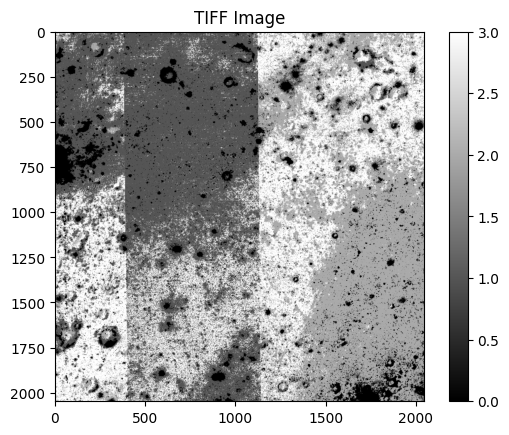

In [32]:
# Specify  the cmap --> "gray" & title --> (Optional)
viewer.run(cmap='gray', title='TIFF Image')

##### ***2. Jet Scale***

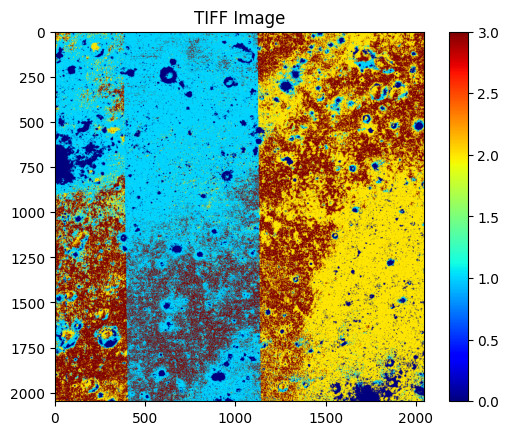

In [33]:
# Specify  the cmap --> "jet" & title --> (Optional)
viewer.run(cmap='jet', title='TIFF Image')

# **Operation 4: Pattern Mining**

## ***Step1: Converting Raster Dataframe into a Database***

In [34]:
# Install PAMI library for Pattern Mining
!pip install PAMI

#### ***Reducing the size of our dataframe***
#### ***Because it will consume a lot of time and memory***

In [35]:
# Select only the first 1000 pixels in the Raster File
df = df.iloc[:1000,:]

### ***Step 1.1: Import RasterDF2DB from geoanalytics.conversion***

In [36]:
from geoanalytics.conversion import RasterDF2DB

In [37]:
# Pass the dataframe as input dataframe
obj = RasterDF2DB.RasterDF2DB(dataframe=df)

### ***Step 1.2: Prepare the Transactional Dataframe***

In [38]:
obj.prepareTransactionalDataframe()

Prepared transactional DataFrame: (9, 1000)


### ***Step 1.3: Give the desired output  `DBname` and `condition` along with `thresholdValue`***

In [39]:
# Select the pixels which has their band value more than or equal to 4000
obj.convertToTransactionalDB(DBname='transactionalDB.csv', condition='>=', thresholdValue=4000)

Saved transaction DB to: transactionalDB.csv


##### **Print the head of the Transactional Database**

In [40]:
!head transactionalDB.csv

POINT(1068542.75,-485173.607)	POINT(1068557.557,-485173.607)	POINT(1068572.363,-485173.607)	POINT(1068587.169,-485173.607)	POINT(1072718.134,-485173.607)	POINT(1072732.94,-485173.607)	POINT(1072747.746,-485173.607)	POINT(1072762.553,-485173.607)	POINT(1072777.359,-485173.607)	POINT(1072792.165,-485173.607)	POINT(1072806.972,-485173.607)	POINT(1072821.778,-485173.607)
POINT(1061998.355,-485173.607)	POINT(1062013.162,-485173.607)	POINT(1065152.102,-485173.607)	POINT(1066010.869,-485173.607)	POINT(1066099.707,-485173.607)	POINT(1066114.513,-485173.607)	POINT(1067091.731,-485173.607)	POINT(1067106.537,-485173.607)	POINT(1067121.343,-485173.607)	POINT(1067136.15,-485173.607)	POINT(1067195.375,-485173.607)	POINT(1068305.849,-485173.607)	POINT(1068320.656,-485173.607)	POINT(1068335.462,-485173.607)	POINT(1068350.268,-485173.607)	POINT(1068365.074,-485173.607)	POINT(1068379.881,-485173.607)	POINT(1068394.687,-485173.607)	POINT(1068409.493,-485173.607)	POINT(1068424.3,-485173.607)	POINT(1068439

## ***Step 2: Import the FrequentPatternMining from `geoanalytics.patternmining`***

In [41]:
from geoanalytics.patternMining import FrequentPatternMining

## ***Step 3: Pass the `inputFile` into the algorithm***

In [42]:
alg = FrequentPatternMining.FrequentPatternMining(inputFile='transactionalDB.csv')

## ***Step 4: Show the database statistics to know the appropriate parameters to mine the patterns***

Database size (total no of transactions) : 8
Number of items : 1000
Minimum Transaction Size : 12
Average Transaction Size : 537.125
Maximum Transaction Size : 1000
Standard Deviation Transaction Size : 401.3674866939274
Variance in Transaction Sizes : 184109.55357142858
Sparsity : 0.462875


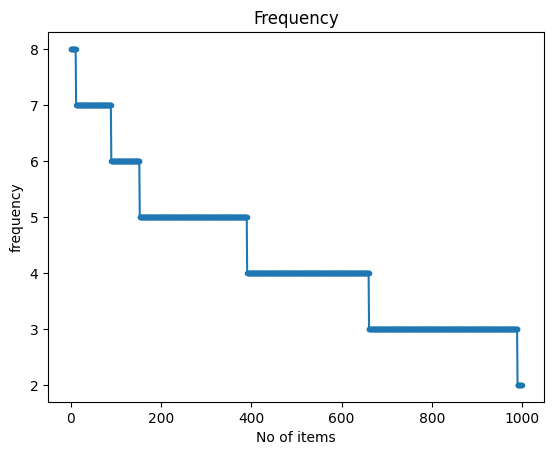

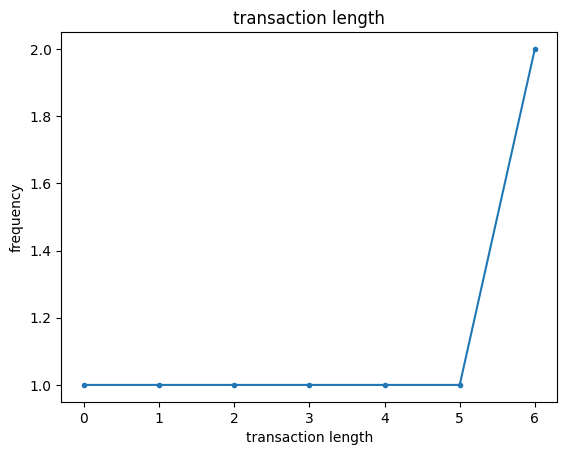

In [43]:
# Get to know the database statistics and visualization of frequency and transaction length graphs
alg.showDBstats()

## ***Step 5: Specify the parameter `minSupport` to mine the patterns in database***

In [44]:
# More Minimum Support --> less Patterns
# Less Minimum Support --> More Patterns
alg.run(minSupport=8)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 4095
Total Memory in USS: 987439104
Total Memory in RSS 1007960064
Total ExecutionTime in ms: 0.012733936309814453


## ***Step 6: Save the patterns***

In [45]:
alg.save(outputFile='FrequentPatterns.txt')

Frequent patterns saved to: FrequentPatterns.txt


#### **View the saved frequent patterns**

In [46]:
!head FrequentPatterns.txt

POINT(1068542.75,-485173.607):8
POINT(1068557.557,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068557.557,-485173.607):8
POINT(1068572.363,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068572.363,-485173.607):8
POINT(1068557.557,-485173.607)	POINT(1068572.363,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068557.557,-485173.607)	POINT(1068572.363,-485173.607):8
POINT(1068587.169,-485173.607):8
POINT(1068542.75,-485173.607)	POINT(1068587.169,-485173.607):8
POINT(1068557.557,-485173.607)	POINT(1068587.169,-485173.607):8
